In [1]:
import pandas as pd
import matplotlib.pylab as plt

In [3]:
crime=pd.read_csv('crime_data (2).csv')
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
## Normalizing data
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [6]:
crime_n= norm_func(crime.iloc[:,1:])
crime_n.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [7]:
# for creating dendrogram
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

In [9]:
z = linkage(crime_n, method = "complete", metric = "euclidean")

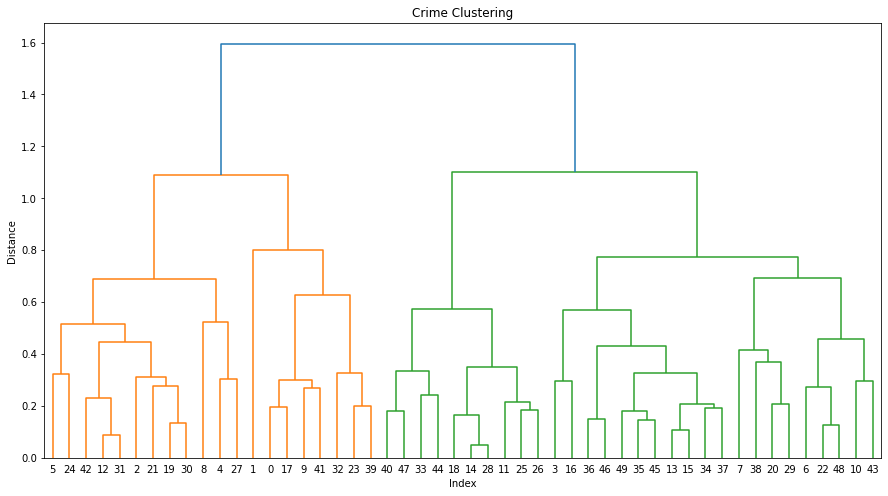

In [10]:
# Dendrogram
plt.figure(figsize=(15, 8));plt.title('Crime Clustering');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, 
    leaf_rotation = 0,  # rotates the x axis labels
    leaf_font_size = 10 # font size for the x axis labels
)
plt.show()

In [11]:
from sklearn.cluster.hierarchical import AgglomerativeClustering
import sklearn.cluster.hierarchical as shch

C:\Users\User-PC\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.cluster.hierarchical module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [14]:
h_clustering=AgglomerativeClustering(n_clusters=6,affinity="euclidean",linkage="complete").fit(crime_n)
h_clustering
h=pd.Series(h_clustering.labels_)
h

0     3
1     4
2     1
3     5
4     1
5     1
6     0
7     0
8     1
9     3
10    0
11    2
12    1
13    5
14    2
15    5
16    5
17    3
18    2
19    1
20    0
21    1
22    0
23    3
24    1
25    2
26    2
27    1
28    2
29    0
30    1
31    1
32    3
33    2
34    5
35    5
36    5
37    5
38    0
39    3
40    2
41    3
42    1
43    0
44    2
45    5
46    5
47    2
48    0
49    5
dtype: int64

In [16]:
crime['clust']=h
crime=crime.iloc[:,[5,0,1,2,3,4]]
crime

,Rape,clust,Unnamed: 0,Murder,Assault,UrbanPop
0,21.2,3,Alabama,13.2,236,58
1,44.5,4,Alaska,10.0,263,48
2,31.0,1,Arizona,8.1,294,80
3,19.5,5,Arkansas,8.8,190,50
4,40.6,1,California,9.0,276,91
5,38.7,1,Colorado,7.9,204,78
6,11.1,0,Connecticut,3.3,110,77
7,15.8,0,Delaware,5.9,238,72
8,31.9,1,Florida,15.4,335,80
9,25.8,3,Georgia,17.4,211,60


In [27]:
crime.iloc[:,2:].groupby(crime.clust).median()

,Murder,Assault,UrbanPop
clust,,,
0,3.4,120.0,80.0
1,11.2,254.5,80.0
2,2.4,82.0,52.0
3,14.4,249.0,58.0
4,10.0,263.0,48.0
5,6.8,145.0,66.0


In [30]:
crime['clust'].value_counts()

1    12
5    11
2    10
0     9
3     7
4     1
Name: clust, dtype: int64

After H-clustering has been done, we conclude that there are 6 clusters. The largest cluster is cluster 1, followed by cluster 5 & 2.